# Visualizing high-dimensional data with PCA

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
        
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

<Figure size 640x480 with 1 Axes>

# Principal Components Analysis for Dimensionality Reduction

In [4]:
import pandas as pd
import numpy as np
wine_data = pd.read_csv('data/winequality-white.csv', 
                        names=['Fixed Acidity', 
                               'Volatile Acidity', 
                               'Citric Acid', 
                               'Residual Sugar', 
                               'Chlorides', 
                               'Free Sulfur Dioxide', 
                               'Total Sulfur Dioxide', 
                               'Density', 
                               'pH', 
                               'Sulphates', 
                               'Alcohol', 
                               'Quality'
                              ],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Define testing and train data:

In [5]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Define the benchmark SVM Classifier. We check how our model works with all the features without any transformations.

In [6]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.49183673469387756


Plot a heatmap displaying the correlation between features

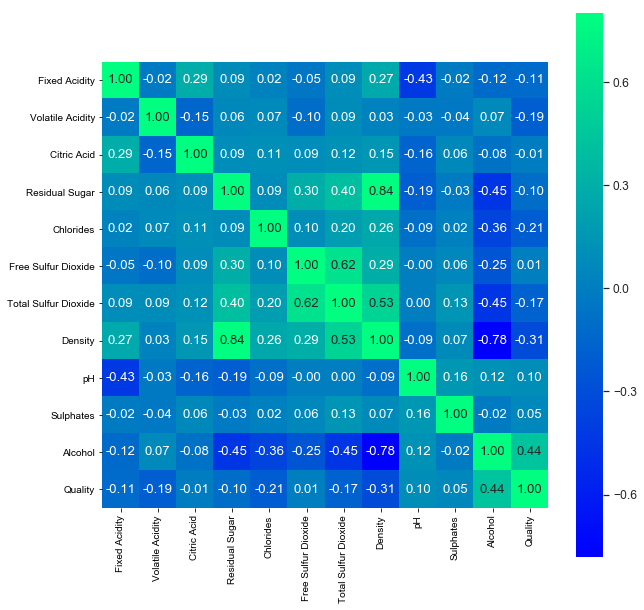

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()

Use PCA for dimensionality reduction

* <b>n_components: </b>Sets the number of dimensions
* <b>whiten: </b>Before projecting the data to the principal components, the data will be normalized so that they have close to identity covariance. This has the effect of preventing one factor which has a high variance from being given too much importance

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_reduced = pca.fit_transform(X)

In [11]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[3.2229119]
[0.29293217]


In [12]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.44081632653061226


# PCA regression (just another one example)

In [1]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

boston_df = pd.read_csv('data/boston.csv')
FEATURES = list(boston_df.columns[:-1])
boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [8]:
from sklearn.decomposition import PCA

def apply_pca(X, n, add_constant = False):
    
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)    
        
    return pca, pd.DataFrame(x_new)

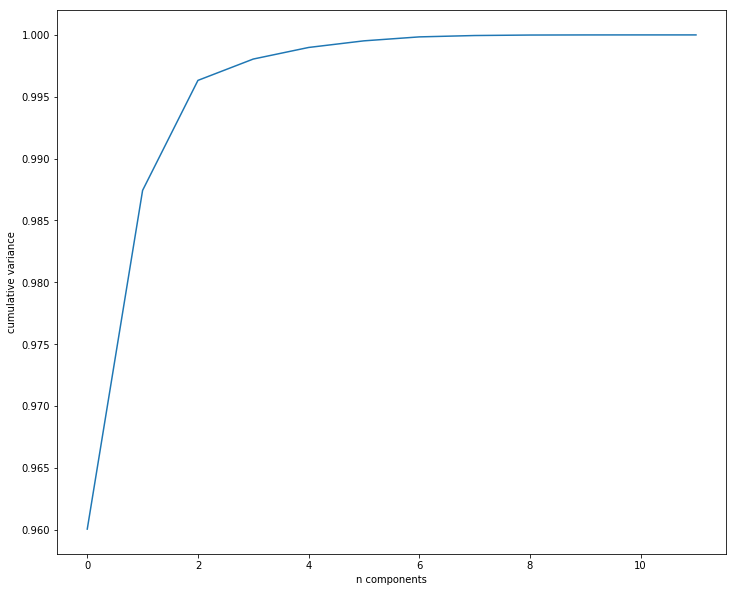

In [10]:
pca, _ = apply_pca(boston_df[FEATURES], len(FEATURES))

plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [12]:
def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = apply_pca(X, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
  
    
    return {
            'x_initial' : X,
            'x_transform': X_new,
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }  

def ols_reg(x_train, y_train):
    
    ols = sm.OLS(y_train, x_train)
    
    model = ols.fit()
    
    return model

def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    
    return model

In [13]:
model_params = {}
model_params['statsmodel_reg'] = build_model(ols_reg,
                                             'Median Home Value',
                                             FEATURES,
                                             boston_df,
                                             7,
                                             True)
model       = model_params['statsmodel_reg']['model']
x_initial   = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train     = model_params['statsmodel_reg']['x_train']
x_test      = model_params['statsmodel_reg']['x_test']
y_train     = model_params['statsmodel_reg']['y_train']
y_test      = model_params['statsmodel_reg']['y_test']
y_pred      = model_params['statsmodel_reg']['y_pred']

Visualize Transform results

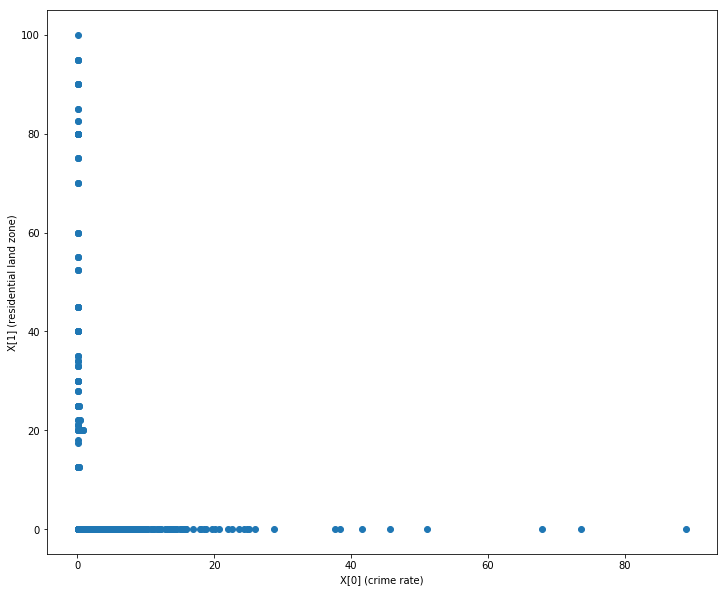

In [15]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap = 'Spectral')
plt.xlabel('X[0] (crime rate)')
plt.ylabel('X[1] (residential land zone)');

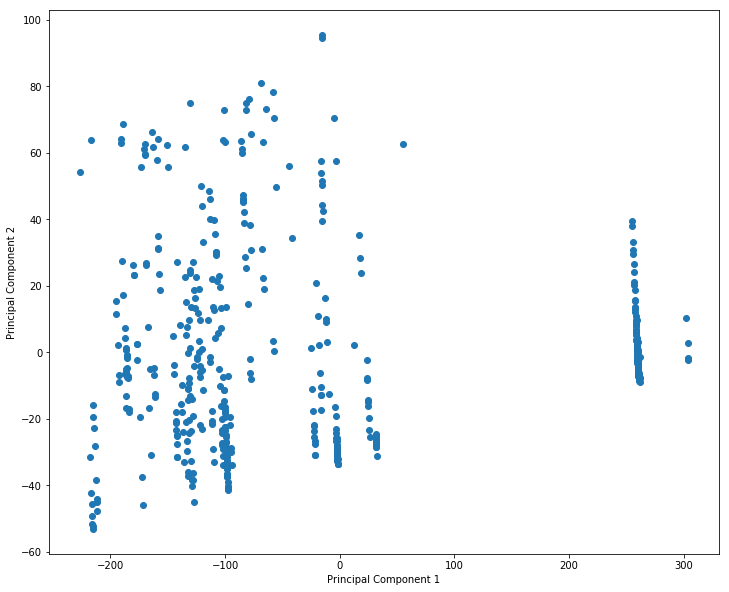

In [16]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [17]:
print('Rsquared: ', model.rsquared)
print('Adjusted Rsquared: ', model.rsquared_adj)

Rsquared:  0.59779014241095
Adjusted Rsquared:  0.5906803722010425


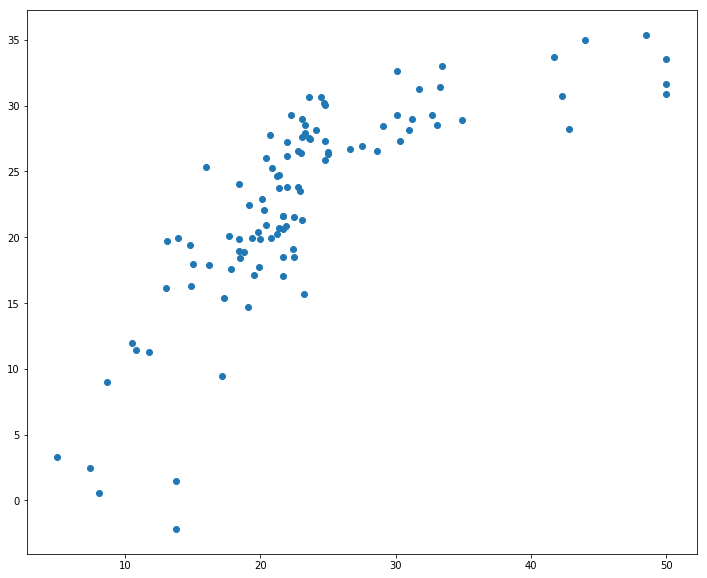

In [18]:
plt.figure(figsize = (12,10))
plt.scatter(y_test.values, y_pred)
plt.show()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Median Home Value   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     84.08
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           2.27e-74
Time:                        10:47:28   Log-Likelihood:                -1288.7
No. Observations:                 404   AIC:                             2593.
Df Residuals:                     396   BIC:                             2625.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             22.4231      0.296     75.748      0.000      21.841      23.005
1             -0.0275      0.002    -15.870      0.000      -0.031      -0.024
2              0.0649      0.011      6.030      0.000       0.044       0.086
3              0.0373      0.019      2.009      0.045       0.001       0.074
4             -0.2742      0.039     -7.065      0.000      -0.350      -0.198
5             -0.8708      0.056    -15.486      0.000      -0.981      -0.760
6              0.2355      0.073      3.214      0.001       0.091       0.380
7             -0.3056      0.098     -3.118      0.002      -0.498      -0.113
==============================================================================
Omnibus:                      113.969   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.396
Skew:                           1.426   Prob(JB):                     3.87e-58
Kurtosis:                       5.753   Cond. No.                         171.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_params['sklearn_reg'] = build_model(linear_reg,
                                          'Median Home Value',
                                           FEATURES,
                                           boston_df,
                                           6)

model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5989419976151316
Testing score:  0.49302520733615895


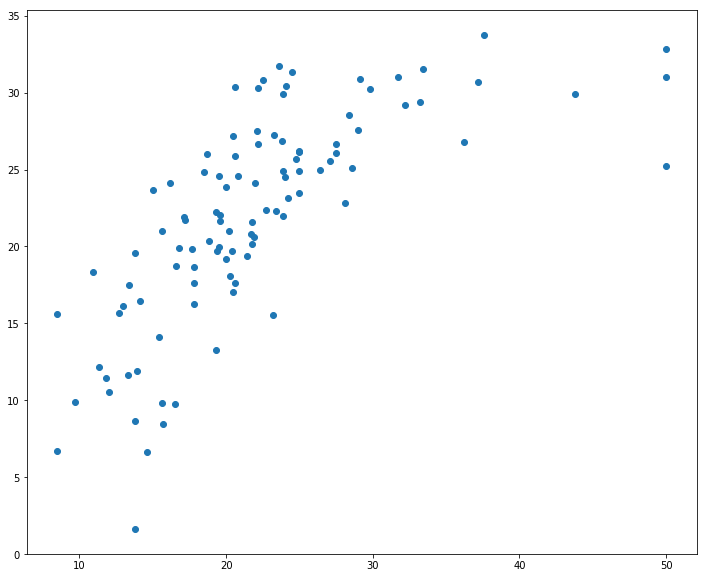

In [22]:
plt.figure(figsize = (12,10))
plt.scatter(y_test.values, y_pred)
plt.show()

# SVD (singular value decomposition) factor analysis

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
X.shape

(150, 4)

Text(0, 0.5, 'sepal width (cm)')

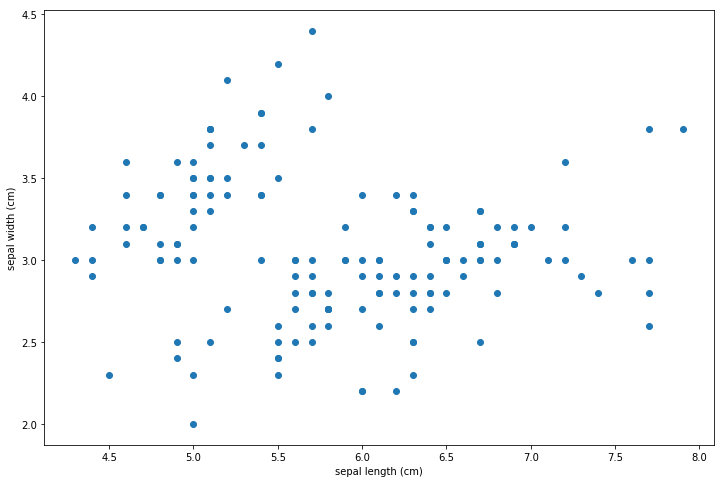

In [24]:
target_names = iris.target_names
y = iris.target

fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'iris type')

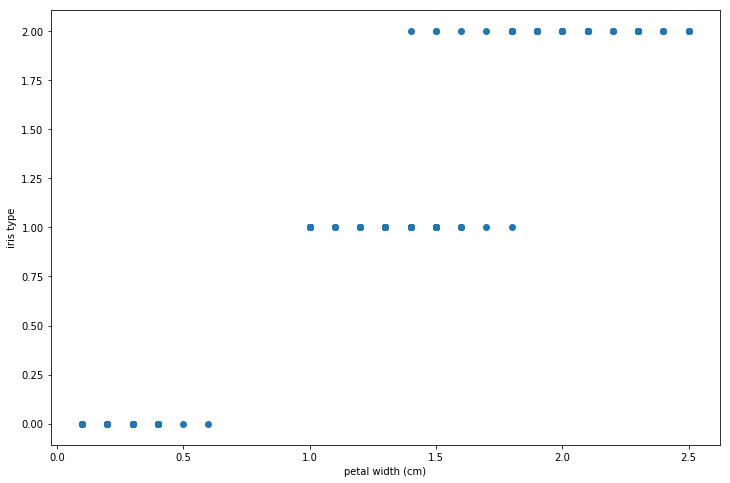

In [25]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(X['petal width (cm)'], pd.DataFrame(data = y))
plt.xlabel('petal width (cm)')
plt.ylabel('iris type')

Text(0, 0.5, 'iris type')

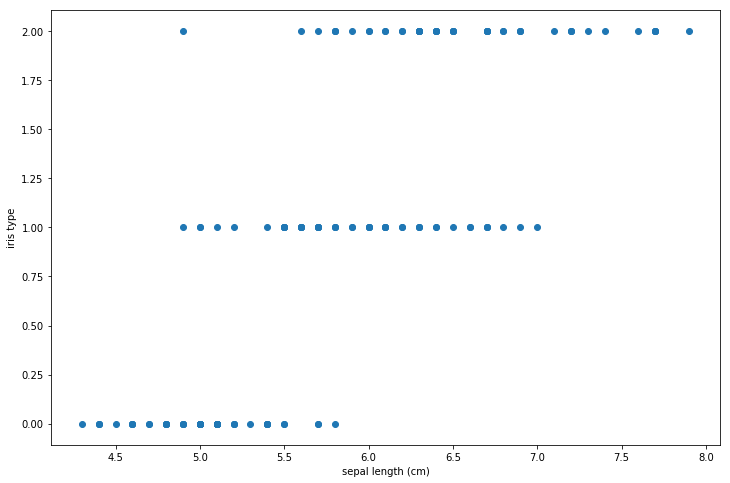

In [26]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(X['sepal length (cm)'], pd.DataFrame(data = y))
plt.xlabel('sepal length (cm)')
plt.ylabel('iris type')

In [27]:
iris_corr = X.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


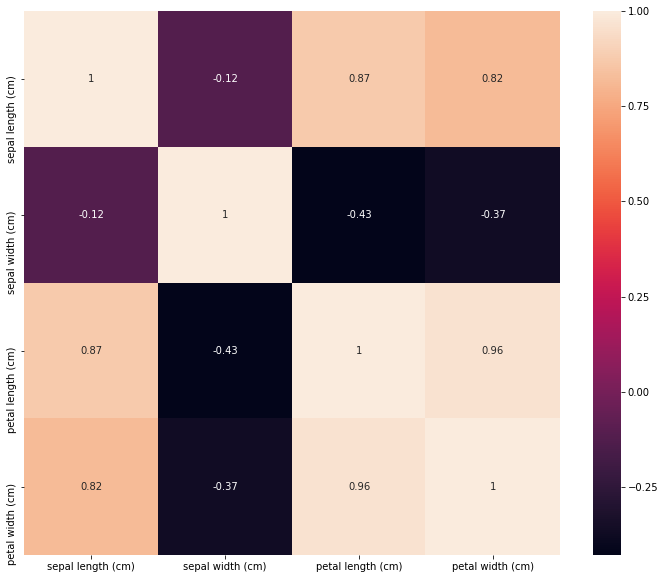

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(iris_corr, annot = True)

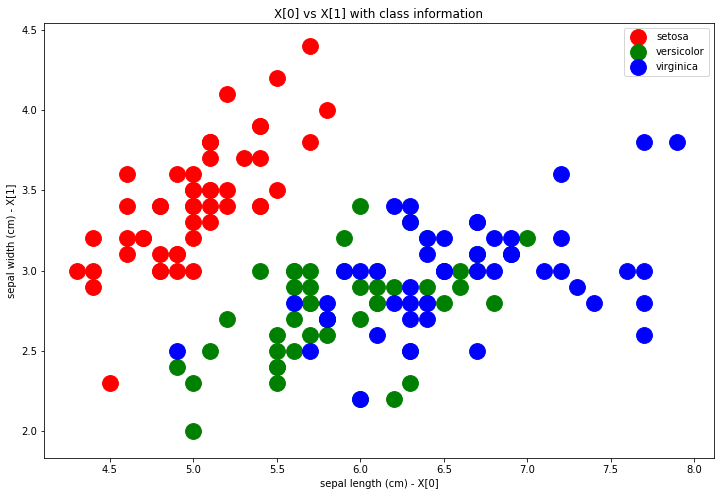

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.array(X)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, s=250, label = target_name)

plt.title('X[0] vs X[1] with class information')
plt.xlabel('sepal length (cm) - X[0]')
plt.ylabel('sepal width (cm) - X[1]')

plt.legend()
plt.show()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_new = lda.fit_transform(X, y)
X_new.shape

(150, 2)

In [31]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


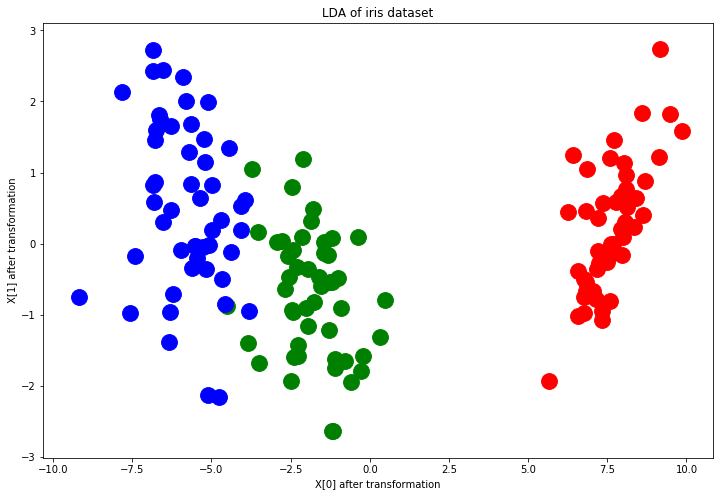

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, s=250, label = target_name)
    

plt.title('LDA of iris dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');
plt.show()

In [33]:
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,-6.239229e-16
1,-6.239229e-16,1.000000e+00


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X, y)
model.score(x, y)

0.96

In [35]:
model = LogisticRegression(solver = 'liblinear', multi_class='auto')
model.fit(X_new, y)
model.score(X_new, y)

0.9333333333333333

# Factor analysis classification

In [38]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

cancer_df = pd.read_csv('data/cancer.csv')
FEATURES = list(cancer_df.columns[:-1])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


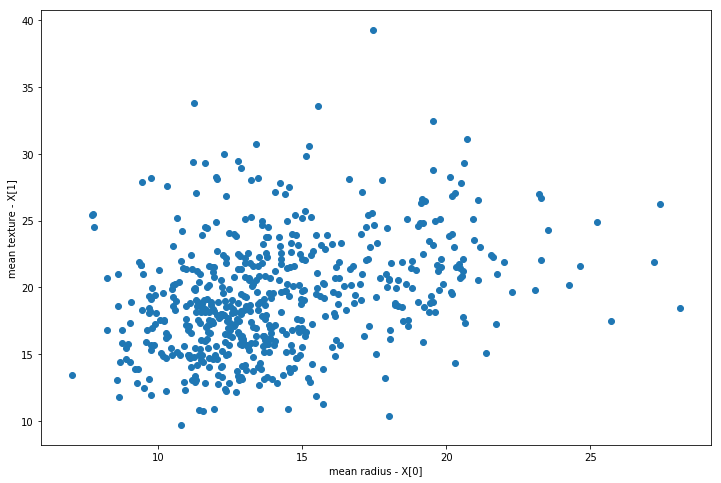

In [39]:
figure = plt.figure(figsize = (12, 8))
plt.scatter(cancer_df.iloc[:,0], cancer_df.iloc[:,1], cmap = 'Spectral')
plt.xlabel('mean radius - X[0]')
plt.ylabel('mean texture - X[1]');

In [41]:
def build_model(name_of_y_col, 
                names_of_x_cols, 
                dataset,
                *hyperparameters):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    fa_obj, X = do_factor_analysis(X, Y, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = logistic_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
  

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall,
            'confusion_matrix' : model_crosstab }   

def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()
        
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    pylab.ylim([0.7, 1.2])

    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()
    
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver = 'liblinear', max_iter=10000)
    model.fit(x_train, y_train)
    
    return model

from sklearn.decomposition import FactorAnalysis

def do_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components = n, random_state = 10, max_iter=10000)
    x_new = fact_a.fit_transform(x, y)
        
    return fact_a, pd.DataFrame(x_new)

result_dict = {}
    
for i in range (1, 31):
    result_dict['n_components - ' + str(i)] = build_model('class',
                                                           FEATURES,
                                                           cancer_df,
                                                           i)

In [42]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.9298245614035088
precision_score :  0.972972972972973
recall_score :  0.9230769230769231

Test:  n_components - 2

accuracy_score :  0.9298245614035088
precision_score :  0.9078947368421053
recall_score :  0.9857142857142858

Test:  n_components - 3

accuracy_score :  0.9035087719298246
precision_score :  0.8783783783783784
recall_score :  0.9701492537313433

Test:  n_components - 4

accuracy_score :  0.9298245614035088
precision_score :  0.9176470588235294
recall_score :  0.9873417721518988

Test:  n_components - 5

accuracy_score :  0.9385964912280702
precision_score :  0.925
recall_score :  0.9866666666666667

Test:  n_components - 6

accuracy_score :  0.9473684210526315
precision_score :  0.9565217391304348
recall_score :  0.9565217391304348

Test:  n_components - 7

accuracy_score :  0.956140350877193
precision_score :  0.9714285714285714
recall_score :  0.9577464788732394

Test:  n_components - 8

accuracy_score :  0.9736842105263158
p

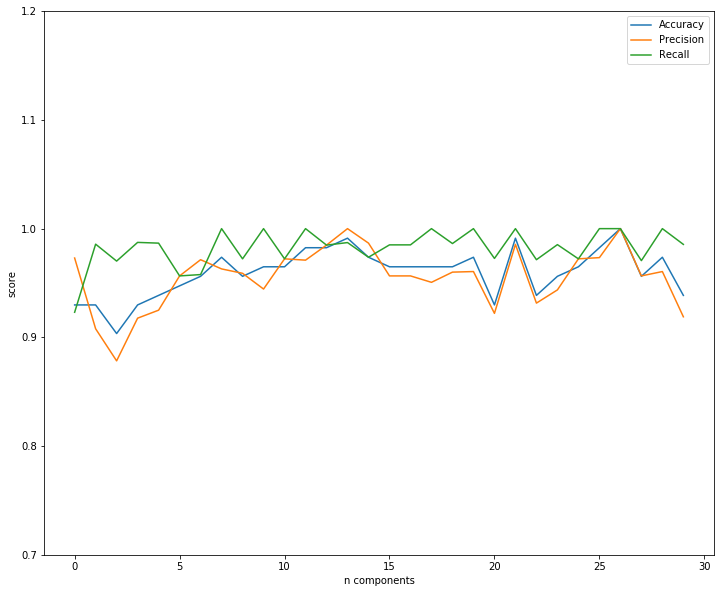

In [44]:
visualize_results(result_dict)

# Manifold learning

In [45]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [46]:
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
1463  0.038384  1.472907 -1.999263
551   0.509457  1.008516 -1.860496
1267 -0.715308  0.310596 -1.698810
400   0.142931  1.783077 -0.010267
912   0.989932  1.190034  1.141544
78    0.977965  0.222734  1.208769
1352 -0.850633  1.930052 -1.525760
1402 -0.963043  1.166043  0.730651
1291 -0.981415  1.591256  0.808103
154   0.306224  0.747648 -0.048041


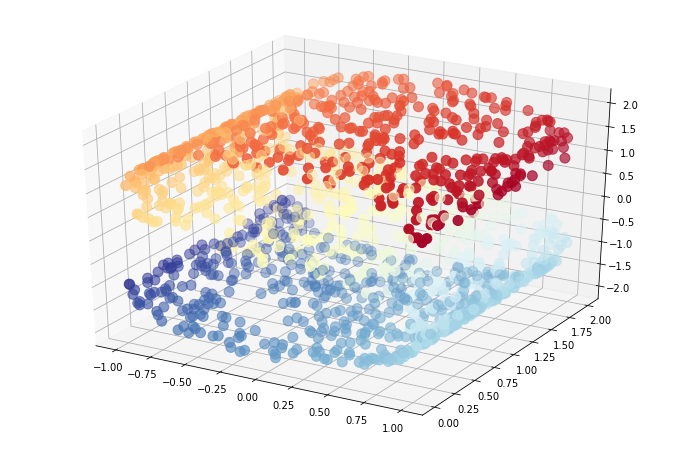

In [47]:
X, color = generate_s_curve(datasets.samples_generator.make_s_curve)

In [48]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

Apply MDS

* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1374  0.521676 -0.149337
1068 -0.527587  0.512086
686  -0.108592  0.146203
398   0.032769  0.023065
497  -0.492382 -0.057926
1273  0.233873 -0.703957
725   0.152169 -0.148969
1423  0.276025 -0.323792
987   0.023567 -0.437748
1181  0.362944 -0.467181


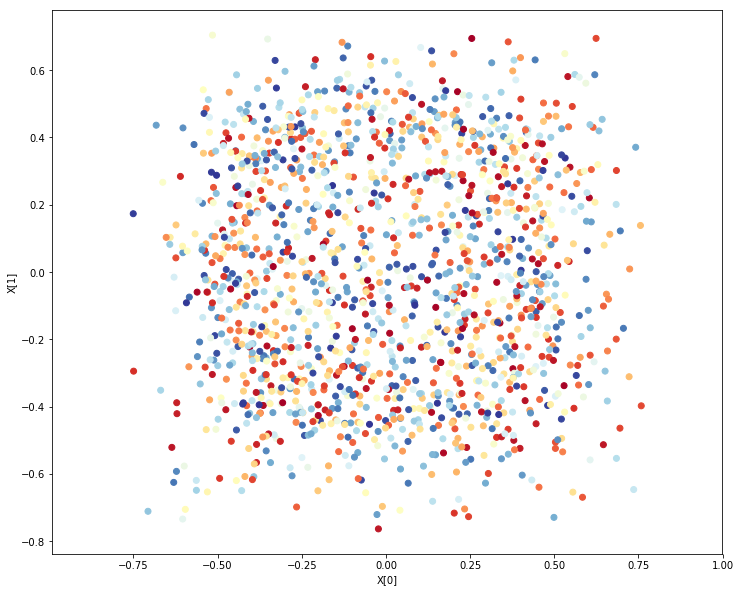

In [50]:
from sklearn.manifold import MDS
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
515   1.312093 -0.390503
1371  0.861379 -0.254042
1346 -1.426665  1.744340
1129  0.916571 -0.228033
53   -1.246885  1.011215
548  -0.314666 -0.058704
863   0.369702 -2.056330
1362  1.135425 -1.753925
1251 -1.302202  1.483779
1048  1.549759 -1.066094


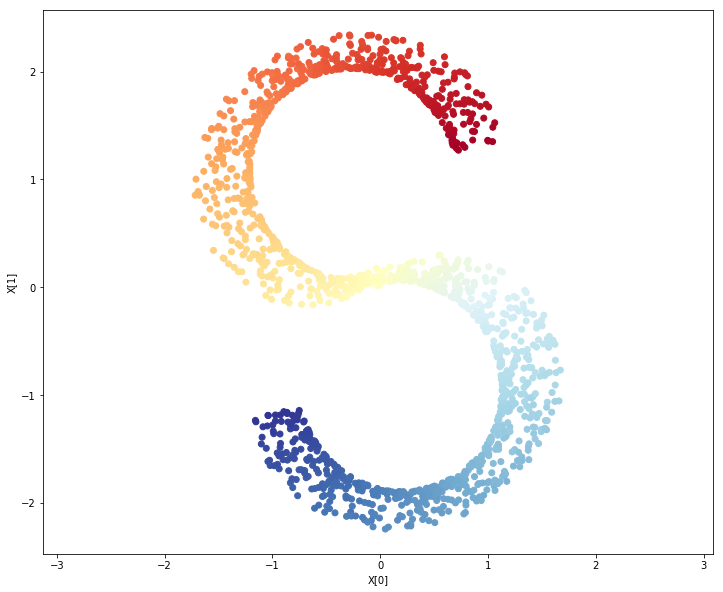

In [51]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

Apply Spectral Embedding

* n_components : The dimension of the projected subspace. 
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
867  -0.002308 -0.000945
706  -0.002525 -0.001773
631  -0.000285  0.002977
1422 -0.002457 -0.001492
1188  0.002949 -0.002555
1234  0.000513  0.003034
891   0.001702  0.001168
839   0.001198  0.002318
812   0.000754  0.002756
354   0.002674 -0.001441


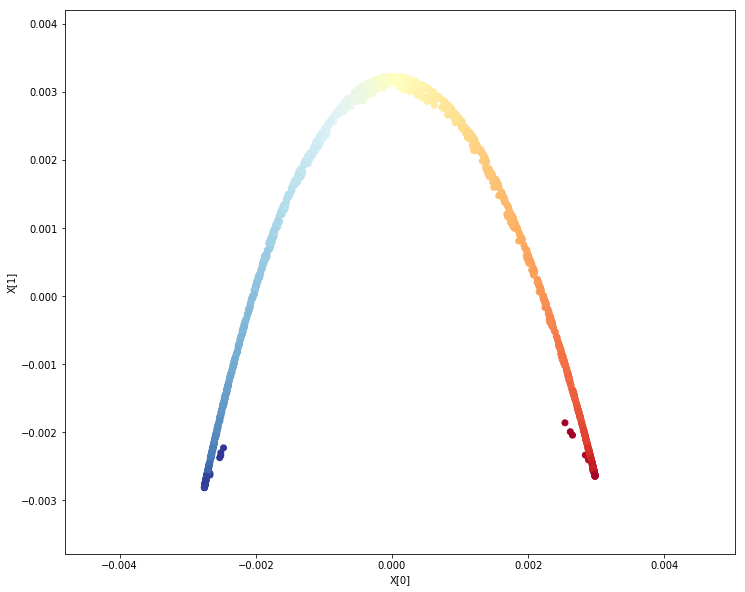

In [52]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

Apply TSNE

* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
from sklearn.manifold import TSNE
tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

Apply Isomap

* n_neighbors : number of neighbors to consider for each point.
* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.
* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1397  2.359110 -0.951941
554   3.735025  0.867991
722   0.039588  0.258090
969  -3.812487 -0.899803
1365  1.870143  0.158979
296  -0.329924  0.831397
760  -3.096885  0.644640
1279  4.490990  0.439310
488   3.930137  0.287905
633  -2.835330  0.455251


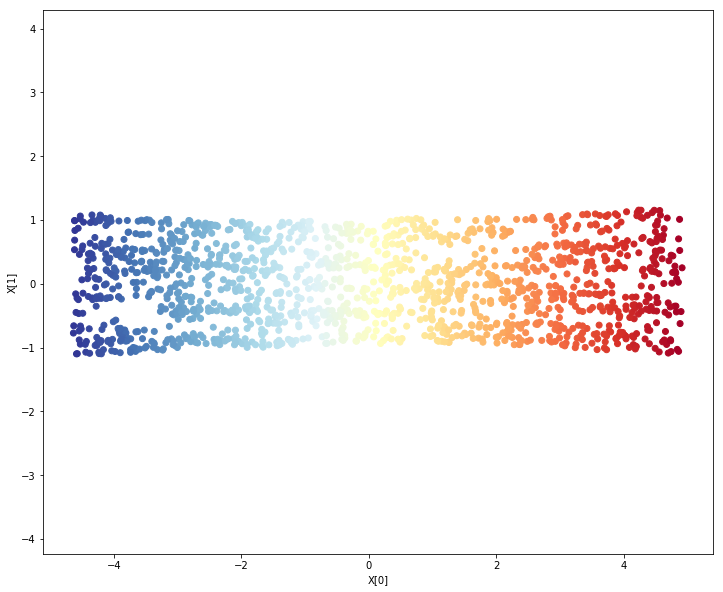

In [54]:
from sklearn.manifold import Isomap
isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

Apply LLE

* n_neighbors :number of neighbors to consider for each point.
* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 
    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 
    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors
* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
811   0.012835 -0.019717
644   0.012305 -0.022479
572  -0.009550 -0.031058
70    0.033538  0.024530
1452 -0.031270  0.013602
647  -0.011248 -0.030922
1407  0.038254  0.039416
1213  0.036650  0.032471
780  -0.009335 -0.029117
1007 -0.011804 -0.026816


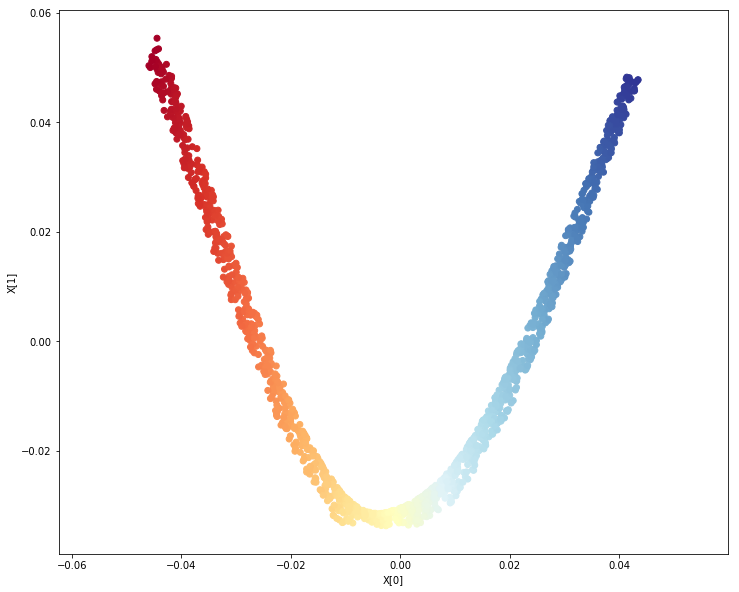

In [55]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') ) 

Apply HLLE

* embedding_ : Stores the embedding vectors
* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (1500, 2)

Sample X : 

             0         1
334   0.025034 -0.010533
1331  0.026728 -0.029780
441  -0.031405 -0.020939
897  -0.042135 -0.014530
684   0.026451  0.017288
824   0.010416 -0.038931
415   0.007625  0.031179
47    0.038572 -0.039545
343  -0.020591 -0.009738
182   0.019273 -0.016528


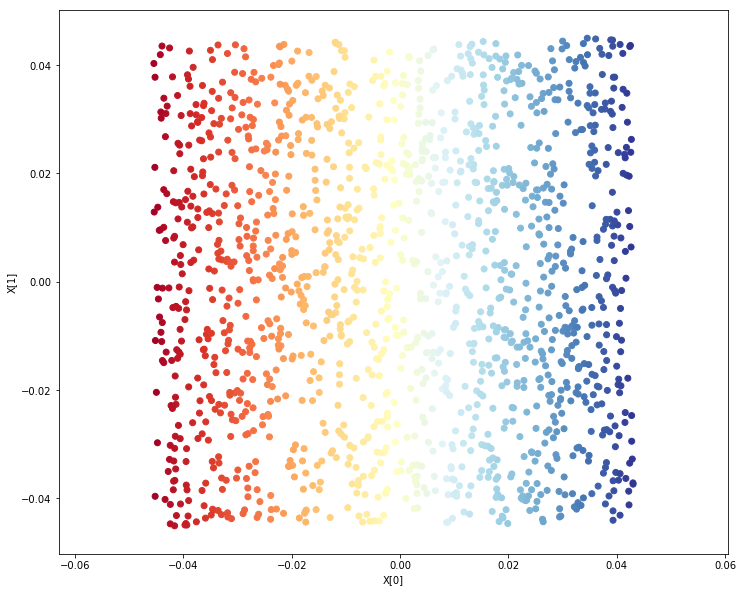

In [57]:
hlle = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))

# Implement Manifold learning techniques on handwritten digits dataset

* Manifold learning is often used is in understanding the relationship between high-dimensional data points. 
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [59]:
import numpy as np
import pandas as pd

import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import load_digits

from sklearn.datasets import load_digits
digits = load_digits()

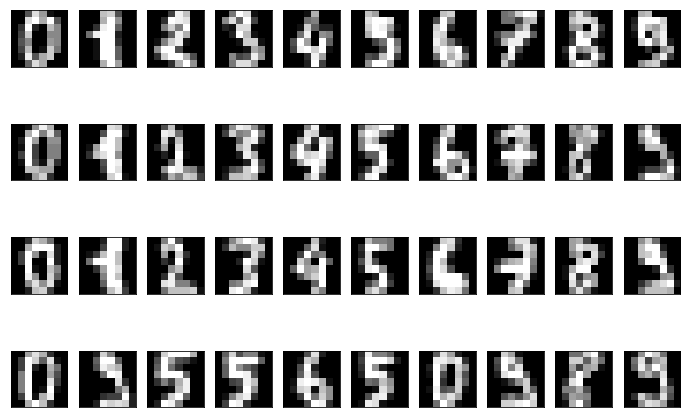

In [60]:
fig, ax = plt.subplots(4, 10, figsize = (12, 8), subplot_kw = dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow( digits.images[i], cmap = 'gray')

In [61]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [62]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
416,0.0,0.0,4.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,13.0,9.0,0.0,0.0,0.0
988,0.0,0.0,0.0,4.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,16.0,6.0,0.0,0.0
1057,0.0,2.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,2.0,12.0,16.0,16.0,7.0,0.0,0.0
831,0.0,0.0,7.0,15.0,14.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0
1347,0.0,0.0,7.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,12.0,16.0,16.0,6.0,0.0,0.0
1222,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,...,16.0,1.0,0.0,0.0,0.0,8.0,14.0,15.0,8.0,0.0
400,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,0.0
289,0.0,0.0,3.0,8.0,9.0,9.0,0.0,0.0,0.0,6.0,...,8.0,0.0,0.0,0.0,7.0,16.0,14.0,8.0,0.0,0.0
1226,0.0,0.0,9.0,16.0,10.0,2.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,6.0,16.0,16.0,14.0,1.0,0.0
1514,0.0,0.0,0.0,0.0,5.0,15.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,4.0,0.0


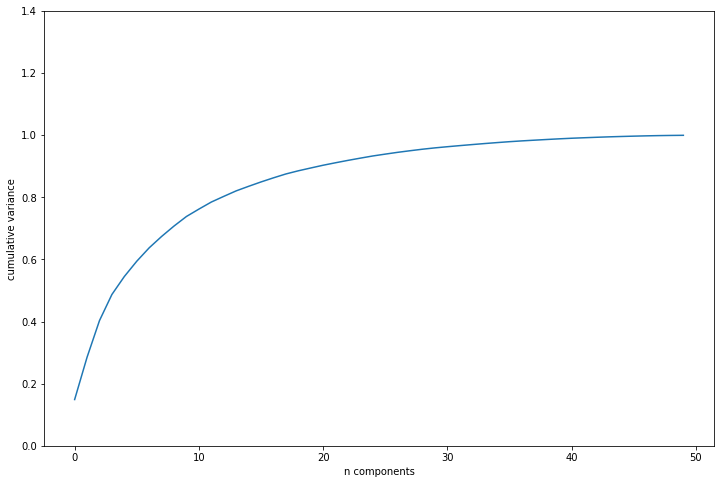

In [63]:
from sklearn.decomposition import PCA

model = PCA(50).fit(X)

plt.figure( figsize = (12, 8))
plt.plot(np.cumsum(model.explained_variance_ratio_ ))
pylab.ylim([0, 1.4])
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [64]:
classes = list(range(10))
target_names = digits.target_names

def apply_manifold_learning(X, y, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X).sample(10))
    print()
    
    fig, ax = plt.subplots(figsize = (12, 8))
    for i, target_name in zip(classes, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    label = target_name, 
                    cmap = plt.cm.Spectral, s=100)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2');

    plt.legend()
    plt.show()
    
    return method

New shape of X :  (1797, 2)

Sample X : 

             0         1
963   0.230618  0.057708
1452 -0.578438 -0.575505
1704  0.703587  0.641996
1203  0.074508 -0.216947
97    0.062429 -0.164160
1387  0.087975  0.069489
670  -0.457949 -0.332052
582   0.411458 -0.107549
660   0.251572  0.412302
674  -0.285941 -0.481278



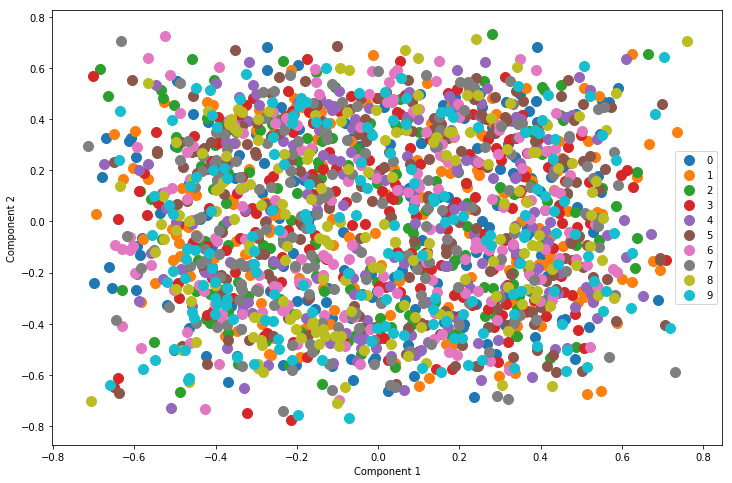

In [65]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = False, n_init = 1, max_iter = 100))

New shape of X :  (1797, 2)

Sample X : 

              0          1
812  -25.099350  19.762666
1063   2.283053  36.048175
471   26.151694  13.484426
1669   2.772015 -34.243297
890    5.864780  -4.395961
1643  38.918894  -0.946474
422  -31.053151  13.673253
634   30.283046 -23.122498
739   30.655301   6.456945
17    20.526689   1.084187



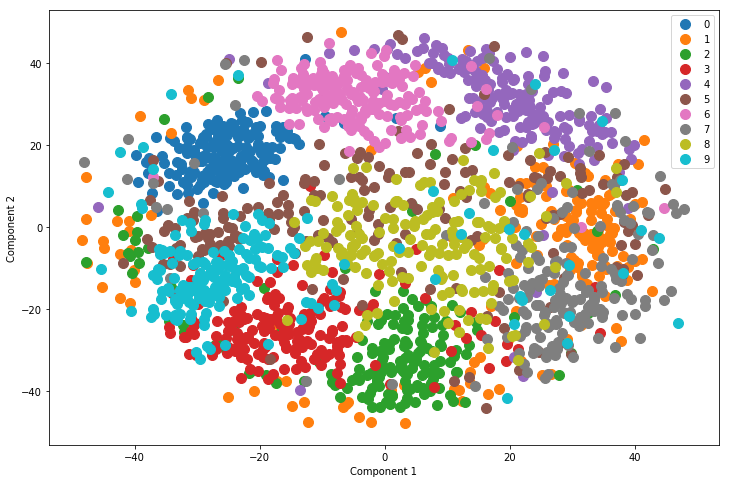

In [66]:
mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100))

New shape of X :  (1797, 2)

Sample X : 

              0          1
422   74.628710   3.591677
611   35.059108  16.769723
1421  52.347413  14.935506
1113 -68.369839   5.435871
192   -3.292081 -52.175937
503  -12.706112  11.087988
803  -78.054628   5.620047
841   37.637496  21.697496
1739  74.636486  11.664324
1529  -6.844742 -11.917074



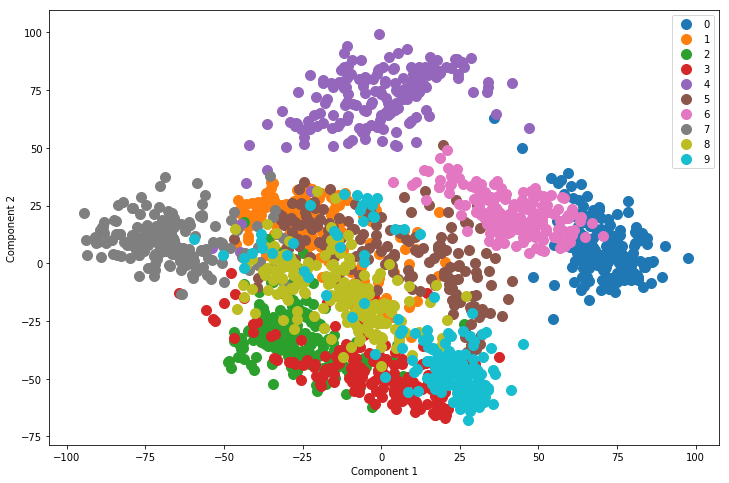

In [67]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, y, Isomap(n_neighbors = 30, n_components = 2))

New shape of X :  (1797, 2)

Sample X : 

             0         1
1066 -0.080584 -0.050846
983   0.017394  0.011265
248  -0.009991 -0.045923
392  -0.012078  0.016311
1675 -0.050680 -0.102887
1237  0.015377 -0.052012
1651  0.026427 -0.005990
429   0.010414  0.044177
497   0.003248 -0.006073
1735  0.009099 -0.000658



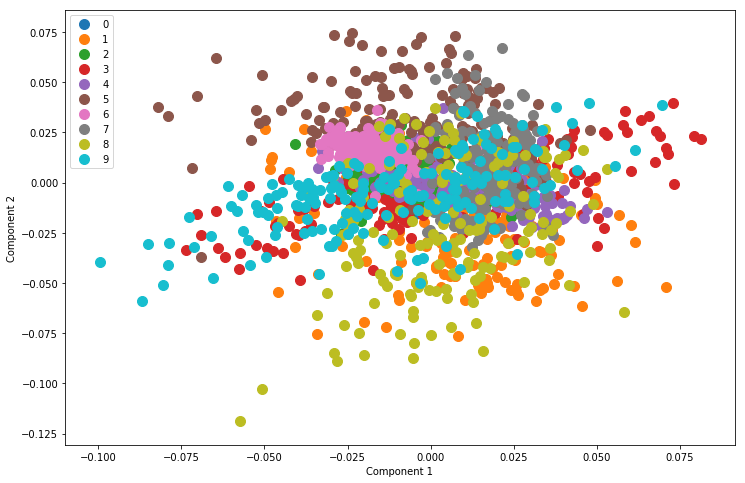

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
248  -0.009095  0.002849
1572 -0.007254  0.012014
1643 -0.010225  0.006083
1227 -0.011014  0.003056
11   -0.008148  0.008725
1656 -0.010313  0.005286
462  -0.008481  0.005231
193  -0.006667  0.010484
345  -0.006583  0.010188
779  -0.006587  0.004760



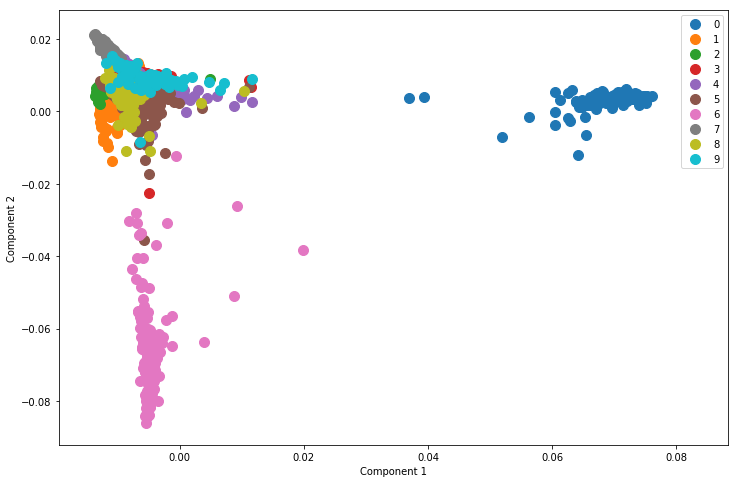

In [69]:
lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'modified'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
664  -0.008548 -0.007459
1245 -0.006461  0.073340
1606 -0.009122 -0.009698
876   0.001586  0.007530
54   -0.009660 -0.006675
547  -0.008344 -0.008498
319  -0.006685 -0.012271
636  -0.003012 -0.006916
78    0.075007 -0.003291
1015 -0.007066 -0.006361



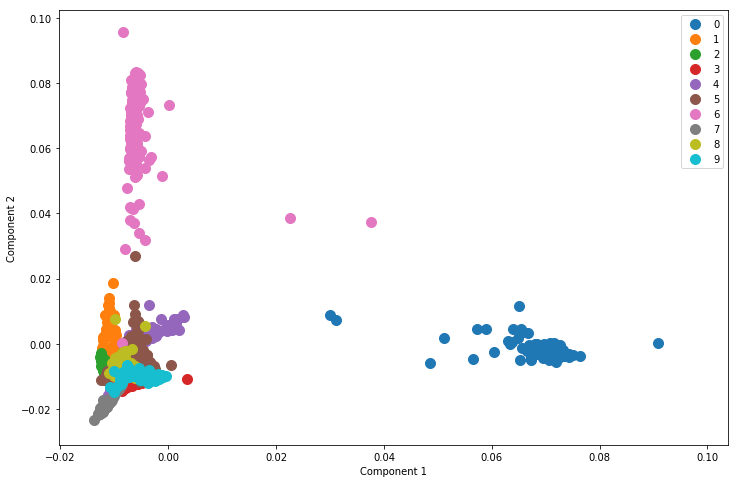

In [70]:
hlle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
11   -0.000667  0.001008
989   0.002417  0.003090
847  -0.001223  0.000314
674  -0.000546 -0.000510
1208 -0.001594 -0.000843
397  -0.000848  0.000655
1449  0.002242  0.002637
721  -0.001522 -0.000558
1269 -0.001659  0.001314
1188 -0.000164 -0.002518



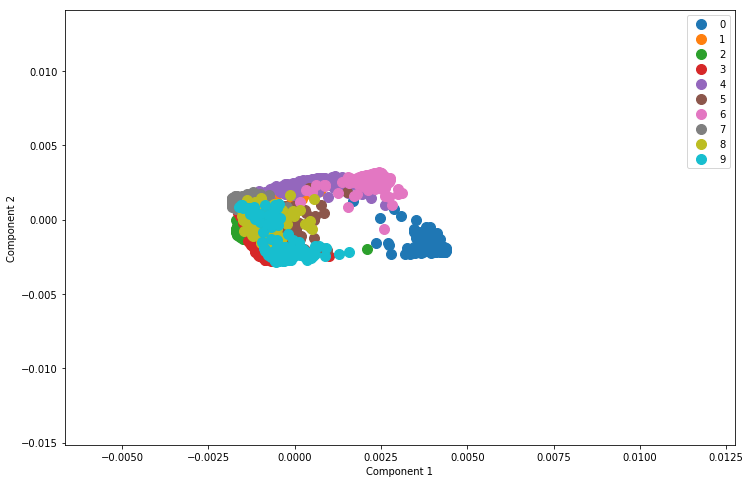

In [71]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, y, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (1797, 2)

Sample X : 

              0          1
823   17.577585 -19.710798
1740 -25.367670  26.545589
162  -19.792658  -7.622630
1758 -46.441784   8.559295
1413   7.050889  50.866993
1792 -25.984743  30.909403
574   18.915697  16.327257
1763  10.064893 -13.226859
1231 -14.754647   2.860716
144   47.509609  -0.727991



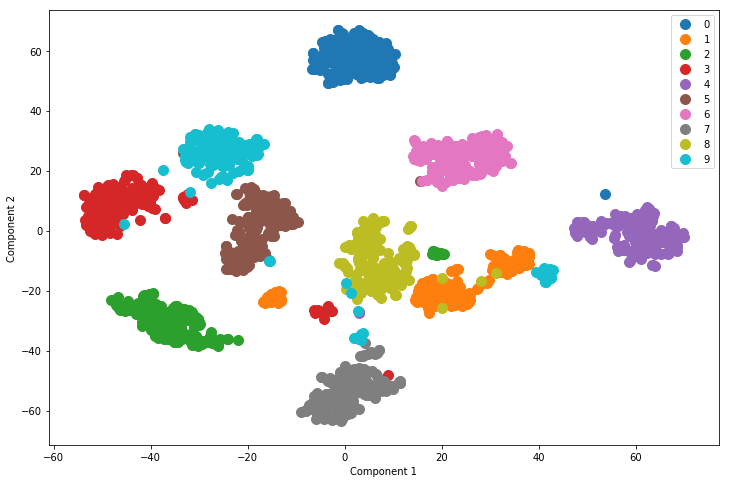

In [72]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, y, TSNE(n_components = 2, init = 'pca', random_state = 0))

# Implement Manifold learning on complex data using the Olivetti faces dataset

* Manifold learning is often used is in understanding the relationship between high-dimensional data points. 
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\andre\scikit_learn_data


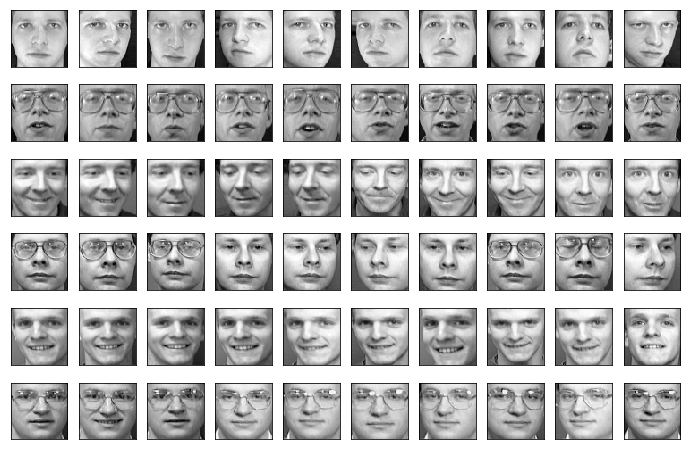

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

fig, ax = plt.subplots(6, 10, figsize=(12, 8), subplot_kw=dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [75]:
X = faces.data
y = faces.target
X.shape

(400, 4096)

In [76]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
264,0.661157,0.747934,0.776860,0.764463,0.838843,0.814050,0.822314,0.809917,0.797521,0.785124,...,0.049587,0.049587,0.070248,0.070248,0.074380,0.074380,0.082645,0.086777,0.107438,0.128099
201,0.235537,0.351240,0.433884,0.466942,0.466942,0.500000,0.533058,0.537190,0.533058,0.553719,...,0.388430,0.384298,0.404959,0.417355,0.425620,0.413223,0.359504,0.061983,0.061983,0.103306
207,0.285124,0.219008,0.181818,0.314050,0.388430,0.413223,0.438017,0.458678,0.500000,0.549587,...,0.471074,0.508264,0.508264,0.520661,0.537190,0.512397,0.508264,0.512397,0.289256,0.033058
10,0.541322,0.586777,0.640496,0.661157,0.685950,0.685950,0.690083,0.698347,0.694215,0.690083,...,0.483471,0.483471,0.495868,0.512397,0.528926,0.363636,0.111570,0.095041,0.111570,0.111570
323,0.144628,0.123967,0.111570,0.111570,0.123967,0.128099,0.136364,0.123967,0.181818,0.202479,...,0.557851,0.648760,0.553719,0.264463,0.508264,0.611570,0.640496,0.570248,0.516529,0.504132
199,0.669421,0.677686,0.673554,0.673554,0.657025,0.636364,0.648760,0.644628,0.648760,0.685950,...,0.462810,0.359504,0.219008,0.210744,0.219008,0.210744,0.223140,0.223140,0.219008,0.223140
384,0.326446,0.198347,0.214876,0.239669,0.260331,0.280992,0.334711,0.384298,0.438017,0.462810,...,0.367769,0.355372,0.359504,0.371901,0.367769,0.334711,0.330579,0.318182,0.256198,0.115702
236,0.223140,0.301653,0.392562,0.458678,0.500000,0.512397,0.516529,0.504132,0.533058,0.533058,...,0.652893,0.657025,0.623967,0.586777,0.574380,0.607438,0.458678,0.351240,0.252066,0.202479
271,0.595041,0.640496,0.615702,0.644628,0.685950,0.723140,0.731405,0.706612,0.760331,0.760331,...,0.206612,0.132231,0.210744,0.338843,0.214876,0.214876,0.219008,0.231405,0.210744,0.185950
205,0.508264,0.520661,0.537190,0.524793,0.524793,0.520661,0.553719,0.607438,0.603306,0.611570,...,0.347107,0.595041,0.636364,0.619835,0.632231,0.623967,0.632231,0.628099,0.611570,0.603306


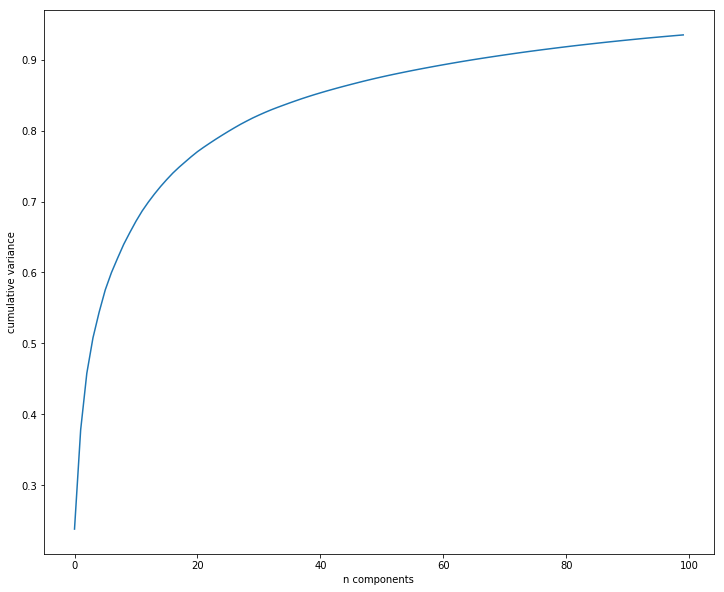

In [77]:
from sklearn.decomposition import PCA

model = PCA(100).fit(X)

plt.figure(figsize = (12, 10))
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [78]:
def plot_components(data, X_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):
    
    ax = ax or plt.gca()
    ax.plot(X_new[:, 0], X_new[:, 1], '.k')
    
    if images is not None:
        
        min_dist = (thumb_frac * max( X_new.max(0) - X_new.min(0) )) ** 2
        shown_images = np.array( [2 * X_new.max(0)] )
        
        for i in range(data.shape[0]):
            
            dist = np.sum((X_new[i] - shown_images) ** 2, 1)
            
            if np.min(dist) < min_dist:
                continue                            # don't show points that are too close
                
            shown_images = np.vstack([shown_images, X_new[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), X_new[i])
            
            ax.add_artist(imagebox)
            
def apply_manifold_learning(X, method, show_scatter_plot = False):
    
    X_new = method.fit_transform(X)
    
    print ("New shape of X : ", X_new.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X_new).sample(10))
    print()

    if show_scatter_plot is not False:
        
        fig, ax = plt.subplots(figsize = (12, 10))
        ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel('X[1] after transformation');
    
    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(X[:20,:], X_new[:20,:], images = faces.images[:, ::2, ::2])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');
    
    return method

New shape of X :  (400, 2)

Sample X : 

            0         1
311 -8.012350  1.474584
346  9.282781  1.747890
325  9.179895 -6.631007
70  -9.697953  6.361153
287  7.267254 -5.588083
275 -5.028136 -2.216716
378  4.669737  6.405563
164  2.748394  6.880488
63  -9.301469  0.614253
47   3.839889  3.852525



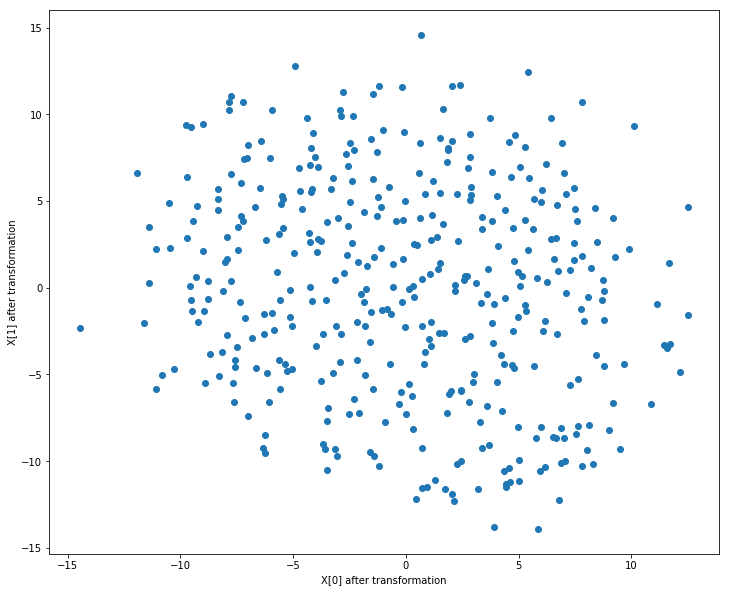

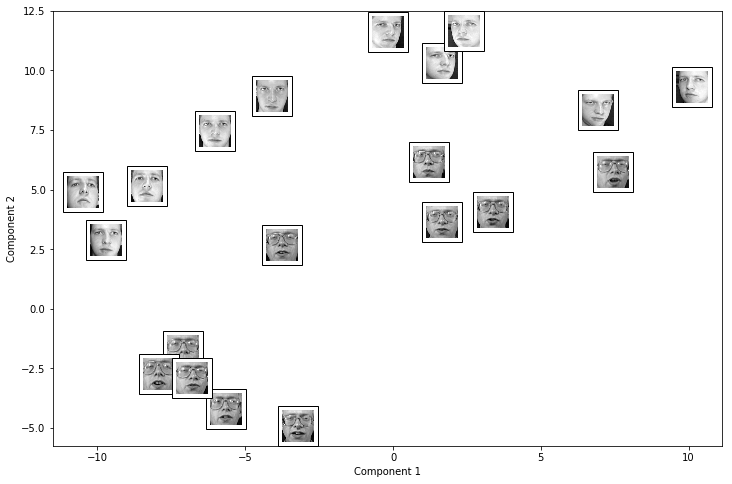

In [79]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, 
        MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100), \
        show_scatter_plot = True )

New shape of X :  (400, 2)

Sample X : 

             0          1
3     0.058461  19.900602
121  -1.939985  -3.689786
382  21.761592   3.981167
120  -2.011224  -0.789927
34   -6.707500  -0.888425
131  -2.528817 -12.734533
348   6.064079  14.304417
5    -1.382763  21.298100
174  -2.746041   5.655581
25   -1.415224   2.840265



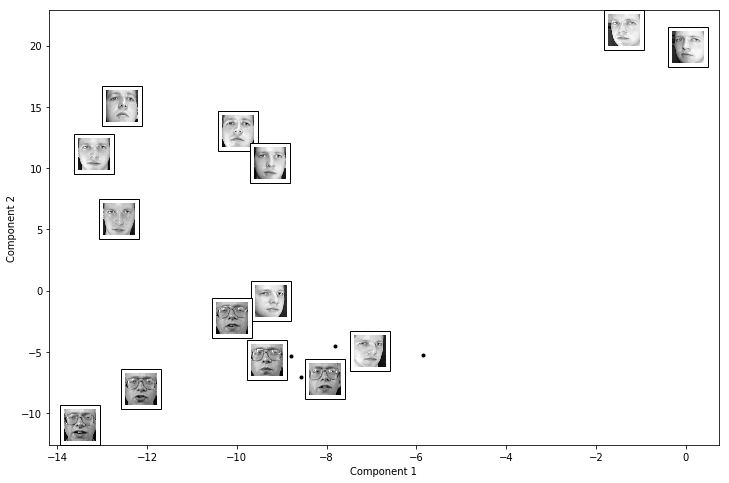

In [80]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 10, n_components = 2))

New shape of X :  (400, 2)

Sample X : 

            0         1
89   0.019360  0.034818
383 -0.139723 -0.017809
79   0.022294 -0.001488
269  0.023779  0.014610
131  0.021917  0.024759
330 -0.146470 -0.020617
77   0.027846 -0.061109
57   0.026337  0.028121
202 -0.050714  0.012182
188  0.040500 -0.247237



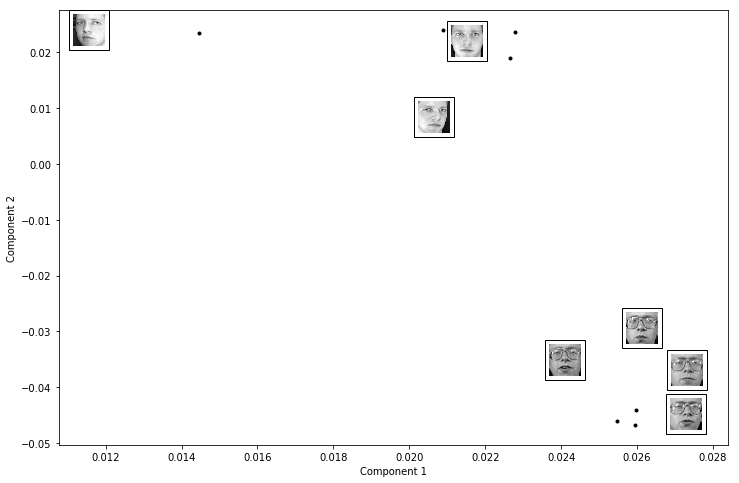

In [81]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'standard'))

New shape of X :  (400, 2)

Sample X : 

            0         1
261  0.005293 -0.017530
127  0.006423 -0.014385
32   0.005697 -0.007607
125  0.005566 -0.016451
354  0.006897 -0.034035
243  0.005538 -0.015031
275  0.006465 -0.020891
272  0.006305 -0.020617
263  0.005583 -0.018367
166  0.007071 -0.015910



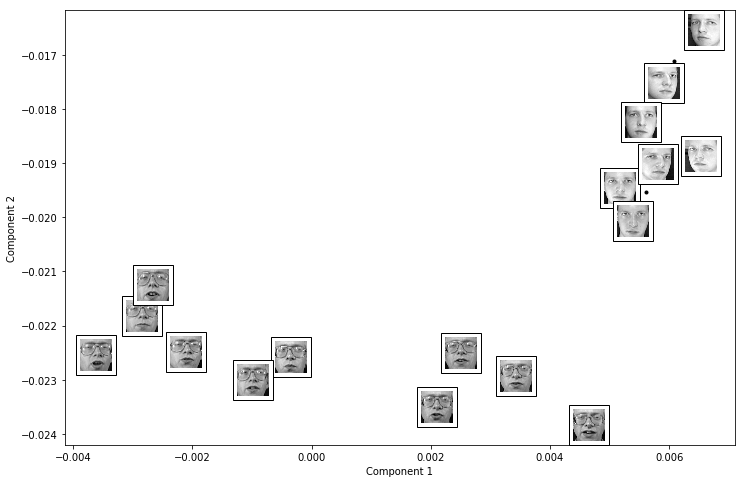

In [82]:
hlle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian'))

New shape of X :  (400, 2)

Sample X : 

            0         1
24   0.001449  0.008338
391 -0.004965  0.010649
390 -0.000893 -0.006227
287  0.003503  0.011988
31  -0.002644 -0.007067
133 -0.004287 -0.005495
66  -0.007095 -0.002548
57  -0.007009  0.006485
226 -0.003065 -0.003334
161 -0.003120  0.003759



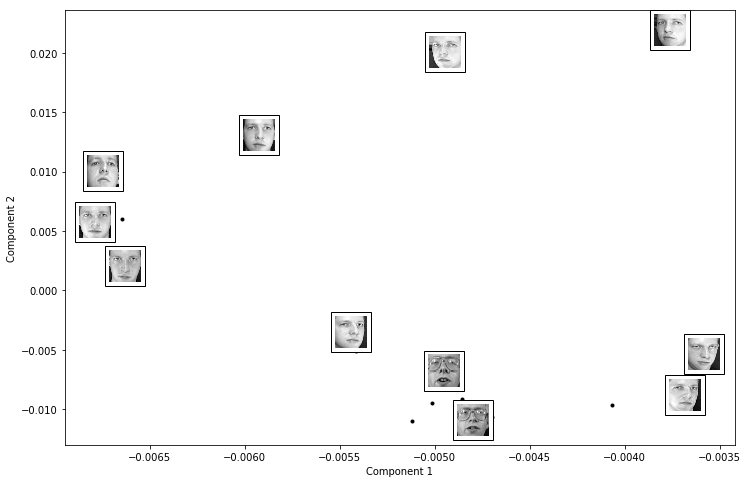

In [83]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (400, 2)

Sample X : 

             0          1
74   -9.050146 -17.469177
52   -3.307062 -19.572241
154  -6.107343 -22.523102
259  -1.772356   4.746451
186 -15.431895 -19.620739
343  14.847364  14.148643
126  13.097749  -0.979395
117  19.187281  -3.149770
242  -3.048190  -0.081196
185 -19.761822 -25.854042



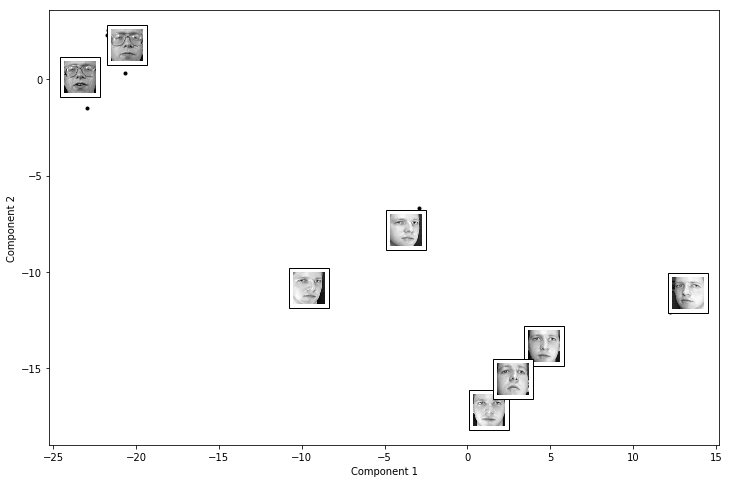

In [84]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))